# Naive bayes : Spam Classifier 

We are going to use a dataset that was published on the UCI Machine Learning repository. You can view the __[abstract](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)__ and the original __[compressed data file](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/)__ on the UCI website

## 1. Import the libraries 

In [41]:
import pandas as pd 
import pprint
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from collections import Counter


## 2.Import our data 

In [6]:
df=pd.read_csv("SMSSpamCollection",delimiter="\t",header=None,names=["label","sms_message"])

In [7]:
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
X=df["sms_message"]
y=df["label"]

## 3. Explore

we want to decode the label column to be ham o 0 and spam 

In [9]:
df["label"]=df.label.map({"ham":0,"spam":1})

In [10]:
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df["label"].value_counts(normalize=True)

0    0.865937
1    0.134063
Name: label, dtype: float64

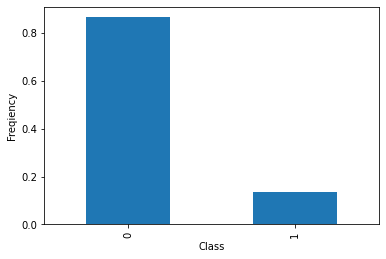

In [31]:
df["label"].value_counts(normalize=True).plot(kind="bar",xlabel="Class",ylabel="Freqiency");

## 4. split to training and test sets

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)                                                                    

(4457,)
(4457,)
(1115,)
(1115,)


## 5. Bag of words 

We need to take every message, split it into words, and count how many they appear. We will use the count vectorizer method from the scikit learn library. There are some parameters for the count vectorizer we need to look at:  
- lowercase default True: To convert all letters to lowercase. Any words written in upper case or lower case will be the same (For example 'She' will be treated similarly to 'she')
- token_pattern: This parameter is responsible for ignoring punctuation
- stop_words default None: To ignore the commonly used words like an, a, and,....etc depending on the language of text you have. In our case, It will be 'English'


For more information about count vectorizer, you can check this __[link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)__

First, we will try to write bag of words from scratch on a simple example, then, we will use the Count Vectorizer method from scikit learn library.

In [46]:
documents = ['Hello, how are you!','Win money, win from home.','Call me now.','Hello, Call hello you tomorrow?']

#convert the text into lowercase
lower_case_documents = [] 
for i in documents:
    lower=i.lower()
    lower_case_documents.append(lower)
    
#remove punctuations    
sans_punctuation_documents = []
for i in lower_case_documents:
    sans=i.translate(str.maketrans('', '', string.punctuation))
    sans_punctuation_documents.append(sans)
    
#split text into separate words     
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed=i.split()
    preprocessed_documents.append(preprocessed)
    
#count the frequency of each word
frequency_list = []
for i in preprocessed_documents:
    counter=Counter(i)
    frequency_list.append(counter)
    
    
#using scikit learn library to get the frequency of each word
#Note: Count Vectorizer is automatically convert the text into lowercase
#We will not set stop words paramter becaus our data set is small 

count_vector = CountVectorizer()
doc_array=count_vector.fit_transform(documents).toarray()
frequency_matrix = pd.DataFrame(doc_array,columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [14]:
X_train.head()

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
Name: sms_message, dtype: object

We apply Count Vectorizer on our dataset

In [24]:
count_vector = CountVectorizer()
training_data=count_vector.fit_transform(X_train)
testing_data=count_vector.transform(X_test)

## 6. Build the Model 

In [25]:
naive_bayes=MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

## 7. Predict

In [35]:
predictions=naive_bayes.predict(testing_data)
pd.Series(predictions).value_counts(normalize=True)

ham     0.874439
spam    0.125561
dtype: float64

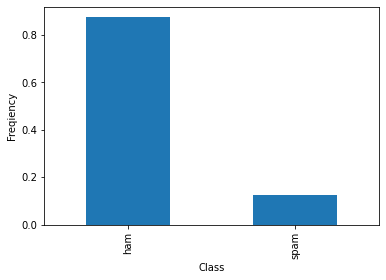

In [30]:
pd.Series(predictions).value_counts(normalize=True).plot(kind="bar",xlabel="Class",ylabel="Freqiency");

## 8.Evaluation

In [87]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

